# Payment_Gateway_Fraud_Detection

###### Importing Required libraries:--

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Read the Data

In [2]:
train = pd.read_csv("C:/Users/ADMIN/Desktop/Insofe/Hackathon/Payment_gateway_hack/Payment_gateway_hack/train_data.csv")

In [3]:
train.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,is_fraud
0,3.580000e+12,2356225,other_debit_cards,118335,cat_1,IND_INR,other_pcs,197217.76,2,1
1,2.600000e+15,2356225,other_debit_cards,118335,cat_1,IND_INR,other_pcs,197000.00,2,1
2,9.100000e+14,2356225,other_debit_cards,118335,cat_1,IND_INR,other_pcs,196000.00,2,1
3,1.750000e+13,5978025,other_debit_cards,118335,cat_1,IND_INR,other_pcs,172000.00,2,1
4,4.340000e+11,826281,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,140000.00,2,1


### Exploratory Data Analysis

In [4]:
# Information of data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  float64
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   partner_pricing_category  76529 non-null  int64  
 9   is_fraud                  76529 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 5.8+ MB


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_number,76529.0,6.940168e+14,7.867854e+14,8.0,4.390000e+13,3.450000e+14,1.170000e+15,2.780000e+15
user_id,76529.0,1.247483e+07,1.205878e+07,1.0,3.515625e+06,9.753129e+06,1.788444e+07,5.592048e+07
partner_id,76529.0,5.849719e+04,3.674022e+04,7889.0,2.366700e+04,4.733400e+04,7.889000e+04,2.130030e+05
money_transacted,76529.0,1.327243e+02,2.350111e+03,-20000.0,-1.000000e+00,2.000000e+01,5.200000e+01,1.972178e+05
partner_pricing_category,76529.0,2.255707e+00,7.321743e-01,0.0,2.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
is_fraud,76529.0,2.012309e-03,4.481390e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [6]:
train.shape

(76529, 10)

In [7]:
train.dtypes

transaction_number          float64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [8]:
#It shoiws the null values

train.isnull().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [9]:
#It shows the NaN values

train.isna().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [10]:
#It shows the is there any duplicate values

train.duplicated().sum()

804

In [11]:
# Drops the duplicate values

train.drop_duplicates(inplace = True)

In [12]:
train.duplicated().sum()

0

In [13]:

train.shape

(75725, 10)

In [14]:
#it shows the how many unique values

train.nunique()

transaction_number          6347
user_id                     3594
payment_method                 6
partner_id                    23
partner_category               9
country                        1
device_type                    4
money_transacted            1454
partner_pricing_category       4
is_fraud                       2
dtype: int64

In [15]:
train.groupby('transaction_number').count()

,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,is_fraud
transaction_number,,,,,,,,,
8.000000e+00,1,1,1,1,1,1,1,1,1
2.700000e+01,1,1,1,1,1,1,1,1,1
6.400000e+01,1,1,1,1,1,1,1,1,1
1.250000e+02,1,1,1,1,1,1,1,1,1
2.160000e+02,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2.740000e+15,89,89,89,89,89,89,89,89,89
2.750000e+15,94,94,94,94,94,94,94,94,94
2.760000e+15,95,95,95,95,95,95,95,95,95


In [16]:
# for numerical attributes

num_att= [var for var in train.columns if train[var].dtype=='int64']
num_att

['user_id', 'partner_id', 'partner_pricing_category', 'is_fraud']

In [17]:
#converting object datatype to category

categorical = train.select_dtypes(include = 'object').columns
train[categorical] = train[categorical].astype('category')

In [18]:
train.dtypes

transaction_number           float64
user_id                        int64
payment_method              category
partner_id                     int64
partner_category            category
country                     category
device_type                 category
money_transacted             float64
partner_pricing_category       int64
is_fraud                       int64
dtype: object

# visualizations

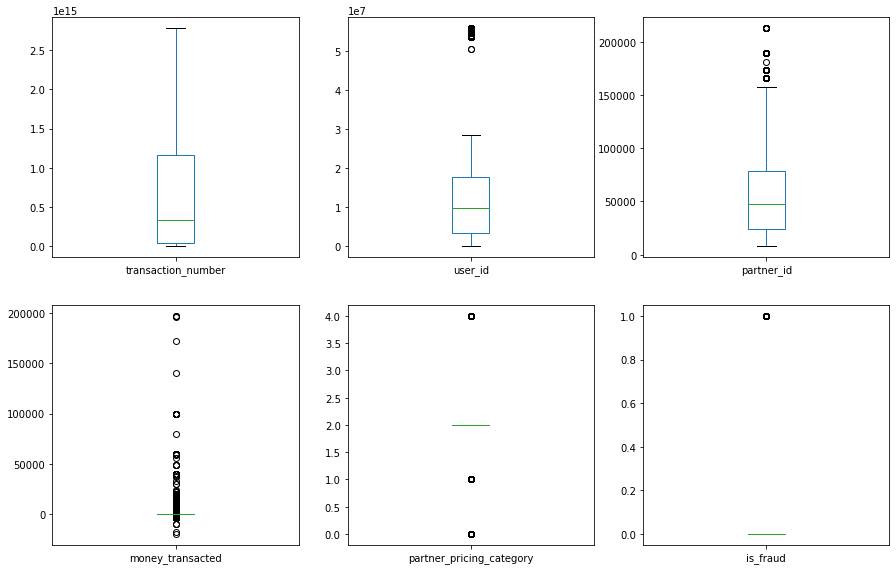

In [19]:
train.plot(kind ='box',subplots = True,sharex= False,sharey=False,layout=(3,3),figsize=(15,15))
plt.show()

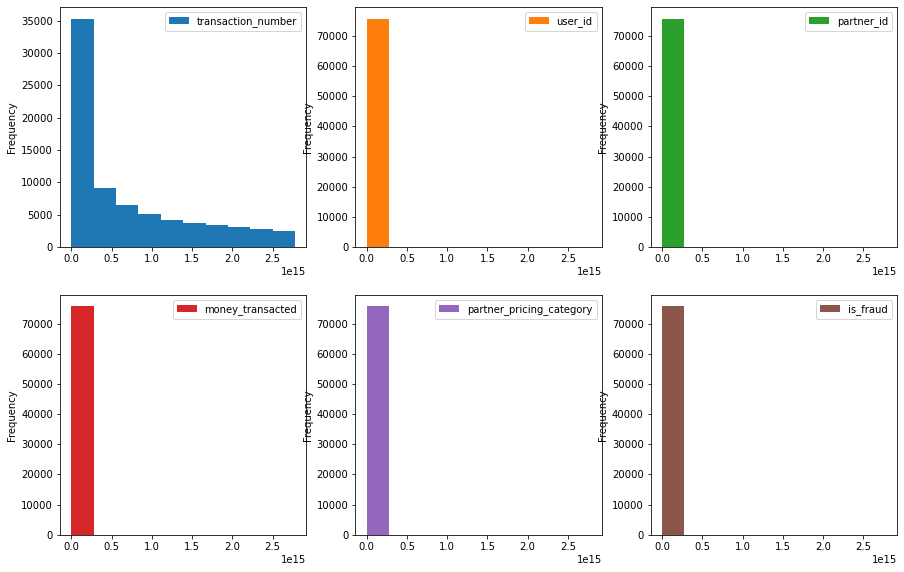

In [20]:
train.plot(kind ='hist',subplots = True,sharex= False,sharey=False,layout=(3,3),figsize=(15,15))
plt.show()

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

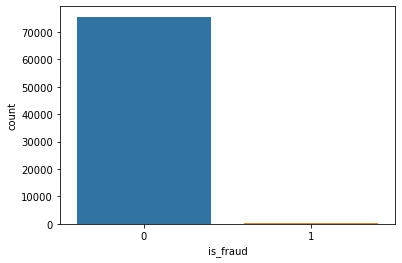

In [21]:
sns.countplot(x='is_fraud',data=train)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


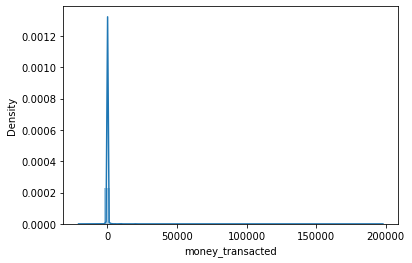

In [22]:
#Density plot
sns.distplot(a=train.money_transacted)
plt.show()

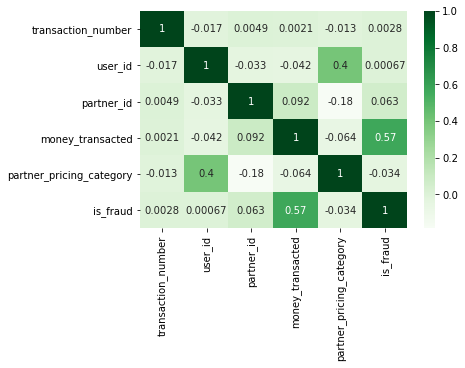

In [23]:
sns.heatmap(train.corr(),annot=True,cmap='Greens')
plt.show()

In [24]:
#for LabelEncoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [25]:
data_n = train.select_dtypes(exclude=np.number).columns
data_n

Index(['payment_method', 'partner_category', 'country', 'device_type'], dtype='object')

In [26]:
for i in data_n:
    train[i] = label_encoder.fit_transform(train[i])
train.head()


,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,is_fraud
0,3.580000e+12,2356225,1,118335,0,0,2,197217.76,2,1
1,2.600000e+15,2356225,1,118335,0,0,2,197000.00,2,1
2,9.100000e+14,2356225,1,118335,0,0,2,196000.00,2,1
3,1.750000e+13,5978025,1,118335,0,0,2,172000.00,2,1
4,4.340000e+11,826281,5,118335,0,0,2,140000.00,2,1


In [27]:
train['payment_method'] = label_encoder.fit_transform(train['payment_method'])
train

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,is_fraud
0,3.580000e+12,2356225,1,118335,0,0,2,197217.76,2,1
1,2.600000e+15,2356225,1,118335,0,0,2,197000.00,2,1
2,9.100000e+14,2356225,1,118335,0,0,2,196000.00,2,1
3,1.750000e+13,5978025,1,118335,0,0,2,172000.00,2,1
4,4.340000e+11,826281,5,118335,0,0,2,140000.00,2,1
...,...,...,...,...,...,...,...,...,...,...
76524,4.020000e+14,53860921,2,78890,1,0,0,-10000.00,4,1
76525,6.740000e+14,54774801,2,23667,1,0,0,-10000.00,4,1
76526,2.020000e+15,55190041,2,23667,1,0,0,-10000.00,0,1
76527,1.850000e+14,53860921,2,23667,1,0,0,-18000.00,4,1


### Clean the data and seperate the data into Independent and Dependent columns

In [28]:
X = train.drop(['is_fraud','country'],axis=1) #independent variable
y = train['is_fraud'] #dependent variable

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11234)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60580, 8)
(15145, 8)
(60580,)
(15145,)


In [31]:
import statsmodels.api as sm

In [32]:
X_reg=sm.add_constant(X_train)
X_test_reg=sm.add_constant(X_test)

### Building the LogisticRegression model

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr_model = LogisticRegression(solver='liblinear',random_state=1230)

In [35]:
Model_1=lr_model.fit(X_train,y_train)

In [36]:


y_train_Pred = lr_model.predict(X_train)
y_test_Pred = lr_model.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix,f1_score
cm = confusion_matrix(y_test, y_test_Pred)

print('Confusion matrix\n\n', cm)


print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[15117     0]
 [   28     0]]

True Positives(TP) =  15117

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  28


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score , r2_score, recall_score,precision_score,f1_score

print('========Train=======')
print(f"Accuracy of model 1 \n{accuracy_score(y_train, y_train_Pred)}")

print('========Test=======')
print(f"Accuracy of model 1 \n{accuracy_score(y_test, y_test_Pred)}")

========Train=======
Accuracy of model 1 
0.9979201056454275
========Test=======
Accuracy of model 1 
0.9981512050181578


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15117
           1       0.00      0.00      0.00        28

    accuracy                           1.00     15145
   macro avg       0.50      0.50      0.50     15145
weighted avg       1.00      1.00      1.00     15145



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


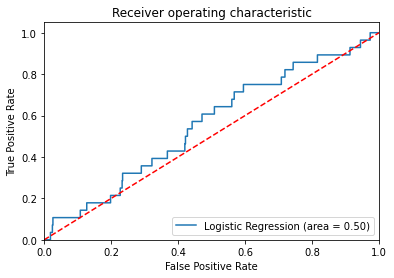

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [41]:
from sklearn import metrics
import numpy as np
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="weighted")
    train_precision= precision_score(train_actual,train_predicted,average="weighted")
    train_f1score  = f1_score(train_actual,train_predicted,average="weighted")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="weighted")
    test_precision= precision_score(test_actual,test_predicted,average="weighted")
    test_f1score  = f1_score(test_actual,test_predicted,average="weighted")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [42]:
scores = get_metrics(y_train,y_train_Pred,y_test,y_test_Pred ,"LogisticRegression",scores)
scores

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.99792,0.99792,0.995845,0.996881,0.998151,0.998151,0.996306,0.997228


# Decision TREE

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion= 'entropy', max_depth=10)

In [44]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [45]:
dt.feature_importances_

array([0.01569428, 0.03305337, 0.0162735 , 0.        , 0.00212411,
       0.        , 0.93096221, 0.00189254])

In [46]:
feature_scores = pd.Series(dt.feature_importances_,
                           index=X_train.columns).sort_values(ascending=False)

feature_scores 

money_transacted            0.930962
user_id                     0.033053
payment_method              0.016273
transaction_number          0.015694
partner_category            0.002124
partner_pricing_category    0.001893
partner_id                  0.000000
device_type                 0.000000
dtype: float64

In [47]:
feature_scores = pd.DataFrame({'Feature_names':X_train.columns,'Importances':dt.feature_importances_})
feature_scores

,Feature_names,Importances
0,transaction_number,0.015694
1,user_id,0.033053
2,payment_method,0.016273
3,partner_id,0.000000
4,partner_category,0.002124
5,device_type,0.000000
6,money_transacted,0.930962
7,partner_pricing_category,0.001893


In [48]:
feature_scores.sort_values(by='Importances',ascending = False)

,Feature_names,Importances
6,money_transacted,0.930962
1,user_id,0.033053
2,payment_method,0.016273
0,transaction_number,0.015694
4,partner_category,0.002124
7,partner_pricing_category,0.001893
3,partner_id,0.000000
5,device_type,0.000000


In [49]:
y_train_predds = dt.predict(X_train)
y_test_predds = dt.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_train, y_train_predds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60454
           1       1.00      0.98      0.99       126

    accuracy                           1.00     60580
   macro avg       1.00      0.99      1.00     60580
weighted avg       1.00      1.00      1.00     60580



In [51]:
print(classification_report(y_test, y_test_predds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15117
           1       0.89      0.89      0.89        28

    accuracy                           1.00     15145
   macro avg       0.95      0.95      0.95     15145
weighted avg       1.00      1.00      1.00     15145



In [52]:
scores=get_metrics(y_train,y_train_predds,y_test,y_test_predds,"DecisionTree_model",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.997920,0.997920,0.995845,0.996881,0.998151,0.998151,0.996306,0.997228
1,DecisionTree_model,0.999967,0.999967,0.999967,0.999967,0.999604,0.999604,0.999604,0.999604


# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
model_knn= KNeighborsClassifier(n_neighbors=5)  #n_neighbors=5 (By default)
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

##### PREDICTION ON TEST DATA

In [55]:
y_train_pred_knn = model_knn.predict(X_train)
y_test_pred_knn  = model_knn.predict(X_test)

In [56]:
print(classification_report(y_train, y_train_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60454
           1       0.00      0.00      0.00       126

    accuracy                           1.00     60580
   macro avg       0.50      0.50      0.50     60580
weighted avg       1.00      1.00      1.00     60580



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15117
           1       0.00      0.00      0.00        28

    accuracy                           1.00     15145
   macro avg       0.50      0.50      0.50     15145
weighted avg       1.00      1.00      1.00     15145



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
scores=get_metrics(y_train,y_train_pred_knn,y_test,y_test_pred_knn,"KNN",scores)
scores

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.997920,0.997920,0.995845,0.996881,0.998151,0.998151,0.996306,0.997228
1,DecisionTree_model,0.999967,0.999967,0.999967,0.999967,0.999604,0.999604,0.999604,0.999604
2,KNN,0.997920,0.997920,0.995845,0.996881,0.998151,0.998151,0.996306,0.997228


# RANDOM FOREST

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [60]:
y_train_predt = classifier.predict(X_train)
y_test_predt = classifier.predict(X_test)

In [61]:
print(classification_report(y_train, y_train_predt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60454
           1       0.99      0.98      0.98       126

    accuracy                           1.00     60580
   macro avg       1.00      0.99      0.99     60580
weighted avg       1.00      1.00      1.00     60580



In [62]:
print(classification_report(y_test, y_test_predt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15117
           1       0.80      0.71      0.75        28

    accuracy                           1.00     15145
   macro avg       0.90      0.86      0.88     15145
weighted avg       1.00      1.00      1.00     15145



In [63]:
scores=get_metrics(y_train,y_train_predt,y_test,y_test_predt,"RandomForestClassifier",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.997920,0.997920,0.995845,0.996881,0.998151,0.998151,0.996306,0.997228
1,DecisionTree_model,0.999967,0.999967,0.999967,0.999967,0.999604,0.999604,0.999604,0.999604
2,KNN,0.997920,0.997920,0.995845,0.996881,0.998151,0.998151,0.996306,0.997228
3,RandomForestClassifier,0.999934,0.999934,0.999934,0.999934,0.999142,0.999142,0.999102,0.999117


# GradientBoostingClassifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
GBM_model = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)

In [66]:
%time GBM_model.fit(X_train, y_train)

Wall time: 2.7 s


GradientBoostingClassifier(learning_rate=0.3, n_estimators=50, subsample=0.8)

In [67]:
y__train = GBM_model.predict(X_train)
y__test = GBM_model.predict(X_test)

In [68]:
print(classification_report(y_test,y__test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15117
           1       1.00      0.54      0.70        28

    accuracy                           1.00     15145
   macro avg       1.00      0.77      0.85     15145
weighted avg       1.00      1.00      1.00     15145



In [69]:
print(classification_report(y_test, y__test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15117
           1       1.00      0.54      0.70        28

    accuracy                           1.00     15145
   macro avg       1.00      0.77      0.85     15145
weighted avg       1.00      1.00      1.00     15145



In [70]:
scores = get_metrics(y_train,y__train, y_test, y__test, "GBM", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.997920,0.997920,0.995845,0.996881,0.998151,0.998151,0.996306,0.997228
1,DecisionTree_model,0.999967,0.999967,0.999967,0.999967,0.999604,0.999604,0.999604,0.999604
2,KNN,0.997920,0.997920,0.995845,0.996881,0.998151,0.998151,0.996306,0.997228
3,RandomForestClassifier,0.999934,0.999934,0.999934,0.999934,0.999142,0.999142,0.999102,0.999117
4,GBM,0.999505,0.999505,0.999505,0.999471,0.999142,0.999142,0.999142,0.999012


# XGBOOST

In [71]:
!pip install xgboost

In [72]:
from xgboost import XGBClassifier

In [73]:
xgb = XGBClassifier()

In [74]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [75]:
_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

In [76]:
print(classification_report(y_train, _pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60454
           1       1.00      0.99      1.00       126

    accuracy                           1.00     60580
   macro avg       1.00      1.00      1.00     60580
weighted avg       1.00      1.00      1.00     60580



In [77]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15117
           1       0.92      0.82      0.87        28

    accuracy                           1.00     15145
   macro avg       0.96      0.91      0.93     15145
weighted avg       1.00      1.00      1.00     15145



In [78]:
scores = get_metrics(y_train, _pred_train, y_test, y_pred_test, "XGBoost", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.997920,0.997920,0.995845,0.996881,0.998151,0.998151,0.996306,0.997228
1,DecisionTree_model,0.999967,0.999967,0.999967,0.999967,0.999604,0.999604,0.999604,0.999604
2,KNN,0.997920,0.997920,0.995845,0.996881,0.998151,0.998151,0.996306,0.997228
3,RandomForestClassifier,0.999934,0.999934,0.999934,0.999934,0.999142,0.999142,0.999102,0.999117
4,GBM,0.999505,0.999505,0.999505,0.999471,0.999142,0.999142,0.999142,0.999012
5,XGBoost,0.999983,0.999983,0.999983,0.999983,0.999538,0.999538,0.999522,0.999525


# Adaboost

In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [80]:
adaboost =  AdaBoostClassifier()

In [81]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [82]:
y_pred_train = adaboost.predict(X_train)
y_pred_test = adaboost.predict(X_test)

In [83]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60454
           1       0.97      0.90      0.93       126

    accuracy                           1.00     60580
   macro avg       0.98      0.95      0.97     60580
weighted avg       1.00      1.00      1.00     60580



In [84]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15117
           1       0.92      0.79      0.85        28

    accuracy                           1.00     15145
   macro avg       0.96      0.89      0.92     15145
weighted avg       1.00      1.00      1.00     15145



In [85]:
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, "Adaboost", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.997920,0.997920,0.995845,0.996881,0.998151,0.998151,0.996306,0.997228
1,DecisionTree_model,0.999967,0.999967,0.999967,0.999967,0.999604,0.999604,0.999604,0.999604
2,KNN,0.997920,0.997920,0.995845,0.996881,0.998151,0.998151,0.996306,0.997228
3,RandomForestClassifier,0.999934,0.999934,0.999934,0.999934,0.999142,0.999142,0.999102,0.999117
4,GBM,0.999505,0.999505,0.999505,0.999471,0.999142,0.999142,0.999142,0.999012
5,XGBoost,0.999983,0.999983,0.999983,0.999983,0.999538,0.999538,0.999522,0.999525
6,Adaboost,0.999736,0.999736,0.999731,0.999732,0.999472,0.999472,0.999450,0.999451


# Bagging

In [86]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

In [87]:
seed =8
kfold = model_selection.KFold(n_splits = 3)
  

In [88]:
base_cls = DecisionTreeClassifier()
  

In [89]:
num_trees = 500

In [90]:
# bagging classifier
model2 = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = 123)

In [91]:
model2.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  random_state=123)

In [92]:
bagging_y=model2.predict(X_test)
bagging_y2=model2.predict(X_train)

In [93]:
print(classification_report(y_train,bagging_y2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60454
           1       1.00      1.00      1.00       126

    accuracy                           1.00     60580
   macro avg       1.00      1.00      1.00     60580
weighted avg       1.00      1.00      1.00     60580



In [94]:
print(classification_report(y_test,bagging_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15117
           1       0.89      0.89      0.89        28

    accuracy                           1.00     15145
   macro avg       0.95      0.95      0.95     15145
weighted avg       1.00      1.00      1.00     15145



In [95]:
scores = get_metrics(y_train, bagging_y2, y_test, bagging_y, "Bagging", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.997920,0.997920,0.995845,0.996881,0.998151,0.998151,0.996306,0.997228
1,DecisionTree_model,0.999967,0.999967,0.999967,0.999967,0.999604,0.999604,0.999604,0.999604
2,KNN,0.997920,0.997920,0.995845,0.996881,0.998151,0.998151,0.996306,0.997228
3,RandomForestClassifier,0.999934,0.999934,0.999934,0.999934,0.999142,0.999142,0.999102,0.999117
4,GBM,0.999505,0.999505,0.999505,0.999471,0.999142,0.999142,0.999142,0.999012
5,XGBoost,0.999983,0.999983,0.999983,0.999983,0.999538,0.999538,0.999522,0.999525
6,Adaboost,0.999736,0.999736,0.999731,0.999732,0.999472,0.999472,0.999450,0.999451
7,Bagging,1.000000,1.000000,1.000000,1.000000,0.999604,0.999604,0.999604,0.999604


# SVM

In [96]:
from sklearn import svm
from sklearn.datasets import make_classification

In [97]:
classes =4
X,y= make_classification(100, 5, n_classes = classes, random_state= 40, n_informative = 2, n_clusters_per_class = 1)

X_train, X_test, y_train, y_test=  train_test_split(X, y , test_size=0.2)

In [98]:
model = svm.SVC(kernel = 'linear', random_state = 0, )

In [99]:
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [100]:
y=model.predict(X_test)
y2=model.predict(X_train)

In [101]:
print(classification_report(y_test,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [102]:
print(classification_report(y_train, y2))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        22
           1       0.77      1.00      0.87        17
           2       1.00      0.95      0.98        21
           3       0.94      0.85      0.89        20

    accuracy                           0.91        80
   macro avg       0.92      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



In [103]:
scores = get_metrics(y_train, y2, y_test, y, "SVM", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.997920,0.997920,0.995845,0.996881,0.998151,0.998151,0.996306,0.997228
1,DecisionTree_model,0.999967,0.999967,0.999967,0.999967,0.999604,0.999604,0.999604,0.999604
2,KNN,0.997920,0.997920,0.995845,0.996881,0.998151,0.998151,0.996306,0.997228
3,RandomForestClassifier,0.999934,0.999934,0.999934,0.999934,0.999142,0.999142,0.999102,0.999117
4,GBM,0.999505,0.999505,0.999505,0.999471,0.999142,0.999142,0.999142,0.999012
5,XGBoost,0.999983,0.999983,0.999983,0.999983,0.999538,0.999538,0.999522,0.999525
6,Adaboost,0.999736,0.999736,0.999731,0.999732,0.999472,0.999472,0.999450,0.999451
7,Bagging,1.000000,1.000000,1.000000,1.000000,0.999604,0.999604,0.999604,0.999604
8,SVM,0.912500,0.912500,0.924066,0.913848,1.000000,1.000000,1.000000,1.000000


# Read the test data

In [104]:
test = pd.read_csv("C:/Users/ADMIN/Desktop/Insofe/Hackathon/Payment_gateway_hack/Payment_gateway_hack/test_data.csv")

In [105]:
test.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category
0,8.570500e+14,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2
1,4.400460e+12,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2
2,1.207920e+15,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2
3,2.009730e+15,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,1
4,2.319210e+15,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2


In [106]:
#for LabelEncoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [107]:
data_n = test.select_dtypes(exclude=np.number).columns
data_n

Index(['payment_method', 'partner_category', 'country', 'device_type'], dtype='object')

In [108]:
for i in data_n:
    test[i] = label_encoder.fit_transform(test[i])
test.head()


,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category
0,8.570500e+14,3802500,5,118335,0,0,2,200.0,2
1,4.400460e+12,200704,0,23667,1,0,2,20.0,2
2,1.207920e+15,25150225,2,47334,0,0,0,-100.0,2
3,2.009730e+15,21827584,4,78890,1,0,2,200.0,1
4,2.319210e+15,576081,0,23667,1,0,2,100.0,2


In [109]:
test_data = test.drop(['country',],axis=1) 

In [110]:
final_pred = classifier.predict(test_data)

In [111]:
final_pred.shape

(19133,)

In [112]:
final_pred=pd.DataFrame(final_pred)

In [113]:
predict = classifier.predict(test_data)

In [114]:
Final_data = pd.concat([test['transaction_number'],final_pred],axis = 1).dropna()

In [115]:
Final_data.rename(columns={0:'is_fraud'},inplace=True)

In [116]:
Final_data

,transaction_number,is_fraud
0,8.570500e+14,0
1,4.400460e+12,0
2,1.207920e+15,0
3,2.009730e+15,0
4,2.319210e+15,0
...,...,...
19128,5.332780e+12,0
19129,9.392630e+14,0
19130,1.832460e+13,0
19131,8.934740e+14,0


In [117]:
#Final_data.to_csv('Fraud Transaction Details.csv')